# Own Dataset - weekly polls in Germany

# 1. Open the dataset using pandas



In [665]:
import pandas as pd

In [666]:
%matplotlib inline

In [667]:
#Where did the dataset come from? (I wan)
# ==> https://de.statista.com/themen/82/sonntagsfrage/ 

In [668]:
#If I had questions about this dataset, who would I ask?
# ==> customerservice at statista: kundenservice@statista.com

# 2. Tell me what four of the columns mean, and state whether you made up the definitions or used a data dictionary.

In [669]:
df_0 = pd.read_excel("sonntagsfrage.xlsx", sheetname=0, skiprows=4) 
df_0.tail()
#To know more about the Data, we also have to import the very first excel sheet. 
#Here we find information on how the data was collected, what people were surveyed, when it was published etc. 

,Unnamed: 0,zu den Daten,Unnamed: 2
15,NaN,NaN,NaN
16,NaN,Veröffentlichung durch,wahlrecht.de
17,NaN,Veröffentlichungsdatum,Juni 2017
18,NaN,Herkunftsverweis,wahlrecht.de
19,NaN,ID,30321


In [670]:
df = pd.read_excel("sonntagsfrage.xlsx", sheetname=1, skiprows=4) 
df

,Unnamed: 0,Unnamed: 1,CDU/CSU,SPD,Die Linke,Grüne,FDP,AfD,Sonstige,Unnamed: 9
0,NaN,01.06.2017 GMS,39.0,23,8.0,8.0,10.0,8.0,4.0,in %
1,NaN,02.06.2017 Forschungs- gruppe Wahlen,39.0,25,9.0,7.0,8.0,8.0,4.0,in %
2,NaN,15.06.2017 Infratest dimap,39.0,24,8.0,7.0,9.0,8.0,5.0,in %
3,NaN,17.06.2017 Emnid,39.0,25,9.0,7.0,7.0,8.0,5.0,in %
4,NaN,20.06.2017 INSA,36.5,25,11.0,6.5,9.0,9.0,3.0,in %
5,NaN,20.06.2017 Allensbach,40.0,24,8.5,7.0,10.5,6.5,3.5,in %
6,NaN,21.06.2017 Forsa,39.0,23,10.0,8.0,8.0,7.0,5.0,in %


In [671]:
del df['Unnamed: 0']

In [672]:
df = df.rename(columns={'Unnamed: 1': 'Institut', 'Unnamed: 9': 'Anteil'})
df

,Institut,CDU/CSU,SPD,Die Linke,Grüne,FDP,AfD,Sonstige,Anteil
0,01.06.2017 GMS,39.0,23,8.0,8.0,10.0,8.0,4.0,in %
1,02.06.2017 Forschungs- gruppe Wahlen,39.0,25,9.0,7.0,8.0,8.0,4.0,in %
2,15.06.2017 Infratest dimap,39.0,24,8.0,7.0,9.0,8.0,5.0,in %
3,17.06.2017 Emnid,39.0,25,9.0,7.0,7.0,8.0,5.0,in %
4,20.06.2017 INSA,36.5,25,11.0,6.5,9.0,9.0,3.0,in %
5,20.06.2017 Allensbach,40.0,24,8.5,7.0,10.5,6.5,3.5,in %
6,21.06.2017 Forsa,39.0,23,10.0,8.0,8.0,7.0,5.0,in %


# 3. What are the data types of each column?



In [673]:
df.columns

Index(['Institut', 'CDU/CSU', 'SPD', 'Die Linke', 'Grüne', 'FDP', 'AfD',
       'Sonstige', 'Anteil'],
      dtype='object')

In [674]:
df.dtypes

Institut      object
CDU/CSU      float64
SPD            int64
Die Linke    float64
Grüne        float64
FDP          float64
AfD          float64
Sonstige     float64
Anteil        object
dtype: object

# 4. How many columns and rows does it have?



In [675]:
df.shape

(7, 9)

In [676]:
df['Institut']

0                          01.06.2017 GMS
1    02.06.2017 Forschungs- gruppe Wahlen
2              15.06.2017 Infratest dimap
3                        17.06.2017 Emnid
4                         20.06.2017 INSA
5                   20.06.2017 Allensbach
6                        21.06.2017 Forsa
Name: Institut, dtype: object

In [677]:
df['Institut'].str.contains('^(\d\d).(\d\d).(\d\d\d\d)')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


0    True
1    True
2    True
3    True
4    True
5    True
6    True
Name: Institut, dtype: bool

In [678]:
df['Institut'].str.extract('^(\d\d.\d\d.\d\d\d\d)')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0    01.06.2017
1    02.06.2017
2    15.06.2017
3    17.06.2017
4    20.06.2017
5    20.06.2017
6    21.06.2017
Name: Institut, dtype: object

In [679]:
df['Erhebungsdatum'] = df['Institut'].str.extract('^(\d\d.\d\d.\d\d\d\d)')
df['Institut'] = df['Institut'].str.replace('^(\d\d.\d\d.\d\d\d\d)', '')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [680]:
df

,Institut,CDU/CSU,SPD,Die Linke,Grüne,FDP,AfD,Sonstige,Anteil,Erhebungsdatum
0,GMS,39.0,23,8.0,8.0,10.0,8.0,4.0,in %,01.06.2017
1,Forschungs- gruppe Wahlen,39.0,25,9.0,7.0,8.0,8.0,4.0,in %,02.06.2017
2,Infratest dimap,39.0,24,8.0,7.0,9.0,8.0,5.0,in %,15.06.2017
3,Emnid,39.0,25,9.0,7.0,7.0,8.0,5.0,in %,17.06.2017
4,INSA,36.5,25,11.0,6.5,9.0,9.0,3.0,in %,20.06.2017
5,Allensbach,40.0,24,8.5,7.0,10.5,6.5,3.5,in %,20.06.2017
6,Forsa,39.0,23,10.0,8.0,8.0,7.0,5.0,in %,21.06.2017


In [681]:
df = df[['Erhebungsdatum', 'Institut', 'CDU/CSU', 'SPD', 'Die Linke', 'Grüne', 'FDP', 'AfD', 'Sonstige', 'Anteil']]

In [682]:
df

,Erhebungsdatum,Institut,CDU/CSU,SPD,Die Linke,Grüne,FDP,AfD,Sonstige,Anteil
0,01.06.2017,GMS,39.0,23,8.0,8.0,10.0,8.0,4.0,in %
1,02.06.2017,Forschungs- gruppe Wahlen,39.0,25,9.0,7.0,8.0,8.0,4.0,in %
2,15.06.2017,Infratest dimap,39.0,24,8.0,7.0,9.0,8.0,5.0,in %
3,17.06.2017,Emnid,39.0,25,9.0,7.0,7.0,8.0,5.0,in %
4,20.06.2017,INSA,36.5,25,11.0,6.5,9.0,9.0,3.0,in %
5,20.06.2017,Allensbach,40.0,24,8.5,7.0,10.5,6.5,3.5,in %
6,21.06.2017,Forsa,39.0,23,10.0,8.0,8.0,7.0,5.0,in %


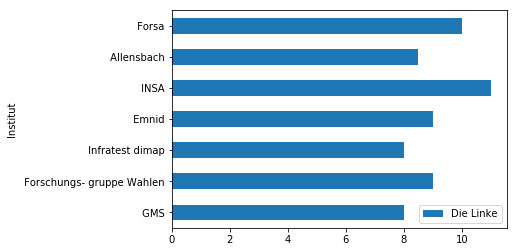

In [683]:
df.plot(x='Institut', y='Die Linke', kind='barh')

In [684]:
df['Die Linke'].mean()

9.0714285714285712

In [685]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [686]:
my_url = ('http://www.wahlrecht.de/umfragen/emnid.htm')
raw_html = urlopen(my_url).read()
soup_doc = BeautifulSoup(raw_html, "html.parser")

In [687]:
#print(soup_doc.prettify())

In [627]:
soup_doc.title.text

'Sonntagsfrage – Emnid (Wahlumfragen zur Bundestagswahl 2017)'

In [601]:
soup_doc.find_all(class_="title")

[<table class="title" width="100%"><tr>
 <td class="title" valign="top"><h1>Emnid</h1></td>
 <td align="right" class="index">[<a href="index.htm" title="Übergeordnete Seite">Umfragen</a>]</td></tr>
 </table>, <td class="title" valign="top"><h1>Emnid</h1></td>]

In [602]:
rows = soup_doc.find_all('tr')
list_parties = []
for row in rows[5:-1]:
    current = {}
    current['Datum'] = row.find_all("td", class_="s")[0].text
    current['CDU'] = row.find_all("td")[2].text
    current['SPD'] = row.find_all("td")[3].text
    current['Grüne'] = row.find_all("td")[4].text
    current['FDP'] = row.find_all("td")[5].string
    current['LINKE'] = row.find_all("td")[6].string
    current['Sonstige'] = row.find_all("td")[7].string
    current['AfD'] = row.find_all("td")[8].string
    current['Befragte'] = row.find_all("td")[10].string
    current['Zeitraum'] = row.find_all("td")[11].string
    list_parties.append(current)

In [603]:
import pandas as pd

In [632]:
df = pd.DataFrame(list_parties)
df.head(10)

,AfD,Befragte,CDU,Datum,FDP,Grüne,LINKE,SPD,Sonstige,Zeitraum
0,5 %,2.054,39 %,17.06.2017,7 %,7 %,9 %,25 %,8 %,08.06.–13.06.
1,4 %,1.398,39 %,10.06.2017,7 %,8 %,9 %,25 %,8 %,01.06.–07.06.
2,5 %,1.838,38 %,03.06.2017,7 %,7 %,8 %,27 %,8 %,24.05.–31.05.
3,5 %,1.703,38 %,27.05.2017,8 %,8 %,8 %,25 %,8 %,18.05.–23.05.
4,5 %,2.413,38 %,20.05.2017,7 %,7 %,9 %,26 %,8 %,11.05.–17.05.
5,4 %,1.837,37 %,13.05.2017,6 %,8 %,10 %,27 %,8 %,04.05.–10.05.
6,5 %,1.935,36 %,06.05.2017,6 %,7 %,9 %,28 %,9 %,27.04.–03.05.
7,4 %,2.439,36 %,29.04.2017,6 %,7 %,9 %,29 %,9 %,20.04.–26.04.
8,4 %,1.412,36 %,22.04.2017,5 %,6 %,9 %,31 %,9 %,13.04.–19.04.
9,3 %,2.436,35 %,15.04.2017,6 %,7 %,9 %,31 %,9 %,06.04.–12.04.


In [633]:
import numpy as np #for using NaN we need to import this
np.nan

nan

In [634]:
df.dtypes

AfD         object
Befragte    object
CDU         object
Datum       object
FDP         object
Grüne       object
LINKE       object
SPD         object
Sonstige    object
Zeitraum    object
dtype: object

In [635]:
def Parteien(row):
    CDU = row['CDU'].replace(' %', '')
    SPD = row['SPD'].replace(' %', '')
    Grüne = row['Grüne'].replace(' %', '') 
    FDP = row['FDP'].replace(' %', '') 
    LINKE = row['LINKE'].replace(' %', '') 
    AfD = row['AfD'].replace(' %', '') 
    Sonstige = row['Sonstige'].replace(' %', '') 
    return pd.Series({'CDU': CDU, 'SPD': SPD, 'Grüne': Grüne, 'FDP':FDP, 'LINKE':LINKE, 'AfD':AfD, 'Sonstige': Sonstige})

In [608]:
correct = df.apply(Parteien, axis=1)
print(correct)

    AfD CDU FDP Grüne LINKE SPD Sonstige
0     5  39   7     7     9  25        8
1     4  39   7     8     9  25        8
2     5  38   7     7     8  27        8
3     5  38   8     8     8  25        8
4     5  38   7     7     9  26        8
5     4  37   6     8    10  27        8
6     5  36   6     7     9  28        9
7     4  36   6     7     9  29        9
8     4  36   5     6     9  31        9
9     3  35   6     7     9  31        9
10    3  35   5     7     8  33        9
11    5  33   6     7     8  33        8
12    4  33   5     8     8  33        9
13    5  33   5     8     8  32        9
14    5  33   6     7     8  33        8
15    4  33   6     7     8  32       10
16    5  32   7     7     8  32        9
17    5  32   6     7     8  33        9
18    4  33   6     7     8  32       10
19    5  33   6     8     8  29       11
20    3  37   6    10    10  23       11
21    5  36   6     9    11  21       12
22    4  37   6    10    10  21       12
23    4  38   5 

In [636]:
df['CDU'] = correct['CDU']
df['SPD'] = correct['SPD']
df['Grüne'] = correct['Grüne']
df['FDP'] = correct['FDP']
df['LINKE'] = correct['LINKE']
df['AfD'] = correct['AfD']
df['Sonstige'] = correct['Sonstige']

df.head()

,AfD,Befragte,CDU,Datum,FDP,Grüne,LINKE,SPD,Sonstige,Zeitraum
0,5,2.054,39,17.06.2017,7,7,9,25,8,08.06.–13.06.
1,4,1.398,39,10.06.2017,7,8,9,25,8,01.06.–07.06.
2,5,1.838,38,03.06.2017,7,7,8,27,8,24.05.–31.05.
3,5,1.703,38,27.05.2017,8,8,8,25,8,18.05.–23.05.
4,5,2.413,38,20.05.2017,7,7,9,26,8,11.05.–17.05.


In [637]:
df = df[['CDU', 'SPD', 'Grüne', 'LINKE', 'FDP', 'AfD', 'Sonstige', 'Datum', 'Befragte', 'Zeitraum']]

In [638]:
df.head()

,CDU,SPD,Grüne,LINKE,FDP,AfD,Sonstige,Datum,Befragte,Zeitraum
0,39,25,7,9,7,5,8,17.06.2017,2.054,08.06.–13.06.
1,39,25,8,9,7,4,8,10.06.2017,1.398,01.06.–07.06.
2,38,27,7,8,7,5,8,03.06.2017,1.838,24.05.–31.05.
3,38,25,8,8,8,5,8,27.05.2017,1.703,18.05.–23.05.
4,38,26,7,9,7,5,8,20.05.2017,2.413,11.05.–17.05.


In [639]:
%matplotlib inline

In [640]:
df['Grüne'].mean() # inf means that we need to convert it

inf

In [615]:
#How much percent does the Green Party receive on average?

In [616]:
np.asarray(df['Grüne'], dtype=np.float).mean() # Green Party receives on average 9.9 %

9.9365079365079367

In [617]:
df['Grüne'].sort_values().head(1)

127    10
Name: Grüne, dtype: object

In [652]:
df['CDU'] = correct['CDU'].astype(float)
df['SPD'] = correct['SPD'].astype(float)
df['Grüne'] = correct['Grüne'].astype(float)
df['FDP'] = correct['FDP'].astype(float)
df['LINKE'] = correct['LINKE'].astype(float)
df['AfD'] = correct['AfD'].astype(float)
df['Sonstige'] = correct['Sonstige'].astype(float)

In [653]:
#How is the development for all parties?

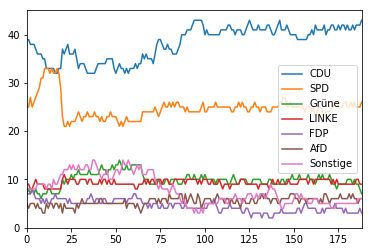

In [654]:
df.plot()

In [620]:
#How is the development of the survey for CDU?

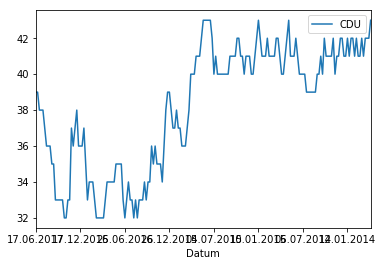

In [655]:
df.plot(x='Datum', y='CDU')

In [622]:
#How does the SPD score in 2017 in comparison to 2014?

In [656]:
df['Year'] = df['Datum'].str.extract('\d\d\.\d\d\.(\d\d\d\d)')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [657]:
df.dtypes

CDU         float64
SPD         float64
Grüne       float64
LINKE       float64
FDP         float64
AfD         float64
Sonstige    float64
Datum        object
Befragte     object
Zeitraum     object
Year         object
dtype: object

In [658]:
df.groupby('Year')['SPD'].mean()

Year
2013    25.384615
2014    24.900000
2015    24.882353
2016    22.803922
2017    28.458333
Name: SPD, dtype: float64

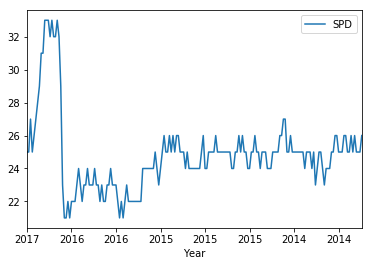

In [659]:
df.plot(x='Year', y='SPD')

In [662]:
df['CDU'][df['Year'] == '2017'].mean()

35.416666666666664

In [664]:
df['SPD'][df['Year'] == '2017'].mean()

28.458333333333332

In [663]:
df['SPD'][df['Year'] == '2014'].mean()

24.899999999999999